In [1]:
import sys
from pathlib import Path

# Asumsi: notebook ada di folder .../fp_kk_11_early_warning_hoax/notebooks
# Jadi root project = parent dari folder saat ini
CWD = Path().resolve()
ROOT_DIR = CWD.parents[0]     # satu level di atas notebooks
print("CWD:", CWD)
print("ROOT_DIR:", ROOT_DIR)

# Supaya bisa import src
sys.path.append(str(ROOT_DIR))


CWD: C:\Kuliah ITS Farhan\Semester 3\A_Final_Project\FP_KK\fp_kk_11_early_warning_hoax\notebooks
ROOT_DIR: C:\Kuliah ITS Farhan\Semester 3\A_Final_Project\FP_KK\fp_kk_11_early_warning_hoax


In [ ]:
import os, sys
sys.path.append(os.path.abspath(".."))
from src.viz import plot_resiko_surface, plot_resiko_slice

import pandas as pd

from src.llm_features import hitung_skor_llm_df
from src.fuzzy_system import hitung_resiko_hoaks


In [7]:
import os, sys
sys.path.append(os.path.abspath(".."))

from src.pipeline import run_llm_fuzzy_pipeline



In [11]:
import pandas as pd
from src.pipeline import run_llm_fuzzy_pipeline

df_dummy = pd.DataFrame({
    "id": [1, 2, 3],
    "text": [
        "SEGERA SEBARKAN!!! VIRUS BARU MENYERANG!!",
        "Pemerintah mengumumkan jadwal vaksinasi resmi.",
        "Ada info dari grup WA katanya BBM akan habis besok."
    ]
})

# sekarang path ini mengarah ke ROOT/data/raw/...
df_dummy.to_csv("data/raw/hoax_dataset_raw.csv", index=False)

df_hasil = run_llm_fuzzy_pipeline(
    input_path="data/raw/hoax_dataset_raw.csv",
    output_path="data/processed/hoax_dataset_with_scores.csv",
    text_col="text",
    save_result=False
)

df_hasil


,id,text,intensitas_emosi,kecurigaan_format,kredibilitas_rendah,resiko_hoaks
0,1,SEGERA SEBARKAN!!! VIRUS BARU MENYERANG!!,1.0,1.0,1.0,64.503824
1,2,Pemerintah mengumumkan jadwal vaksinasi resmi.,0.0,0.0,0.0,13.166667
2,3,Ada info dari grup WA katanya BBM akan habis b...,0.7,0.9,1.0,71.430912


In [ ]:
import os, sys
sys.path.append(os.path.abspath(".."))

import pandas as pd
from src.llm_features import hitung_skor_llm_df_multimodal
from src.fuzzy_system import hitung_resiko_hoaks

df_raw = pd.read_csv("data/raw/hoax_dataset_raw.csv")

df_llm = hitung_skor_llm_df_multimodal(
    df_raw,
    text_col="caption",          # ganti sesuai nama kolom di CSV kamu
    file_post_col="file_postingan",
    file_profil_col="file_profil",
)

def _hitung_resiko_row(row):
    return hitung_resiko_hoaks(
        intensitas_emosi=row["intensitas_emosi"],
        kecurigaan_format=row["kecurigaan_format"],
        kredibilitas_rendah=row["kredibilitas_rendah"],
        output_scale_100=True,
    )

df_llm["resiko_hoaks"] = df_llm.apply(_hitung_resiko_row, axis=1)
df_llm.head()


In [ ]:
from src.llm_features import hitung_skor_llm_df
from src.fuzzy_system import hitung_resiko_hoaks

df_raw = pd.read_csv("data/raw/hoax_dataset_raw_converted.csv")

df_llm = hitung_skor_llm_df(df_raw, text_col="text")

def _hitung_resiko_row(row):
    return hitung_resiko_hoaks(
        intensitas_emosi=row["intensitas_emosi"],
        kecurigaan_format=row["kecurigaan_format"],
        kredibilitas_rendah=row["kredibilitas_rendah"],
        output_scale_100=True,
    )

df_llm["resiko_hoaks"] = df_llm.apply(_hitung_resiko_row, axis=1)
df_llm.head()


In [12]:
import pandas as pd

# 1. Baca dataset asli (id, text)
df = pd.read_csv("data/raw/hoax_dataset_raw_converted.csv")

# 2. Tambah kolom nama file gambar
df["file_postingan"] = df["id"].apply(lambda x: f"postingan_{x}.png")
df["file_profil"]    = df["id"].apply(lambda x: f"profil_{x}.png")

# 3. Simpan ke file baru (supaya yang lama tetap ada)
df.to_csv("data/raw/hoax_dataset_multimodal.csv", index=False)

df.head()


,id,text,file_postingan,file_profil
0,1,PAK JOKOWI RUNTUHKAN RENCANA LICIK SBY PRESIDE...,postingan_1.png,profil_1.png
1,2,"💥💥Prabowo Minta Kejagung Usut,.. Total Kekayaa...",postingan_2.png,profil_2.png
2,3,Secara mengejutkan Ali Mochtar Ngabalin sebut ...,postingan_3.png,profil_3.png
3,4,TERBONGKAR SKANDAL DANA GELAP PUAN MAHARANI VI...,postingan_4.png,profil_4.png
4,5,"EKONOMI T3RANC4M, N3GAR-SUNT1K Rp 901 T KE RAK...",postingan_5.png,profil_5.png


In [1]:
import os, sys
sys.path.append(os.path.abspath(".."))

import src.llm_features as lf

print("File modul:", lf.__file__)
print("Nama fungsi yang ada:")
print([n for n in dir(lf) if "hitung" in n or "skor" in n])


File modul: c:\Kuliah ITS Farhan\Semester 3\A_Final_Project\FP_KK\fp_kk_11_early_warning_hoax\src\llm_features.py
Nama fungsi yang ada:
['hitung_skor_llm_df', 'hitung_skor_llm_df_multimodal', 'skor_hoax_dari_teks', 'skor_hoax_multimodal']


In [2]:
import os, sys
sys.path.append(os.path.abspath(".."))

import pandas as pd
from src.llm_features import hitung_skor_llm_df_multimodal
from src.fuzzy_system import hitung_resiko_hoaks


In [4]:
import os, sys
from pathlib import Path

# tambahkan parent ke sys.path (sudah kamu punya)
sys.path.append(os.path.abspath(".."))

# root project = parent dari folder notebooks
ROOT_DIR = Path(os.path.abspath(".."))

DATA_RAW = ROOT_DIR / "data" / "raw" / "hoax_dataset_multimodal.csv"
print("Path data:", DATA_RAW)


Path data: c:\Kuliah ITS Farhan\Semester 3\A_Final_Project\FP_KK\fp_kk_11_early_warning_hoax\data\raw\hoax_dataset_multimodal.csv


In [5]:
import pandas as pd
from src.llm_features import hitung_skor_llm_df_multimodal
from src.fuzzy_system import hitung_resiko_hoaks

df_raw = pd.read_csv(DATA_RAW)

df_llm = hitung_skor_llm_df_multimodal(
    df_raw,
    text_col="text",
    file_post_col="file_postingan",
    file_profil_col="file_profil",
)


df_llm = hitung_skor_llm_df_multimodal(
    df_raw,
    text_col="text",
    file_post_col="file_postingan",
    file_profil_col="file_profil",
)

def _hitung_resiko_row(row):
    return hitung_resiko_hoaks(
        intensitas_emosi=row["intensitas_emosi"],
        kecurigaan_format=row["kecurigaan_format"],
        kredibilitas_rendah=row["kredibilitas_rendah"],
        output_scale_100=True,
    )

df_llm["resiko_hoaks"] = df_llm.apply(_hitung_resiko_row, axis=1)
df_llm.head()


,id,text,file_postingan,file_profil,intensitas_emosi,kecurigaan_format,kredibilitas_rendah,resiko_hoaks
0,1,PAK JOKOWI RUNTUHKAN RENCANA LICIK SBY PRESIDE...,postingan_1.png,profil_1.png,0.9,0.9,0.8,63.358350
1,2,"💥💥Prabowo Minta Kejagung Usut,.. Total Kekayaa...",postingan_2.png,profil_2.png,0.8,0.9,0.8,63.358350
2,3,Secara mengejutkan Ali Mochtar Ngabalin sebut ...,postingan_3.png,profil_3.png,0.9,0.8,0.7,62.541160
3,4,TERBONGKAR SKANDAL DANA GELAP PUAN MAHARANI VI...,postingan_4.png,profil_4.png,0.9,1.0,0.8,63.358350
4,5,"EKONOMI T3RANC4M, N3GAR-SUNT1K Rp 901 T KE RAK...",postingan_5.png,profil_5.png,0.7,0.9,0.7,64.624286


In [ ]:
# tentukan path output (pakai ROOT_DIR yang tadi)
OUTPUT_PATH = ROOT_DIR / "data" / "processed" / "hoax_dataset_llm_multimodal.csv"
print("Menyimpan ke:", OUTPUT_PATH)

df_llm.to_csv(OUTPUT_PATH, index=False)


Menyimpan ke: c:\Kuliah ITS Farhan\Semester 3\A_Final_Project\FP_KK\fp_kk_11_early_warning_hoax\data\processed\hoax_dataset_llm_multimodal.csv


: 

In [2]:
from pathlib import Path
import pandas as pd

PATH_PROCESSED = ROOT_DIR / "data" / "processed" / "hoax_dataset_llm_multimodal.csv"
print("PATH_PROCESSED:", PATH_PROCESSED)

df = pd.read_csv(PATH_PROCESSED)
df.head()


PATH_PROCESSED: C:\Kuliah ITS Farhan\Semester 3\A_Final_Project\FP_KK\fp_kk_11_early_warning_hoax\data\processed\hoax_dataset_llm_multimodal.csv


,id,text,file_postingan,file_profil,intensitas_emosi,kecurigaan_format,kredibilitas_rendah,resiko_hoaks
0,1,PAK JOKOWI RUNTUHKAN RENCANA LICIK SBY PRESIDE...,postingan_1.png,profil_1.png,0.9,0.9,0.8,63.358350
1,2,"💥💥Prabowo Minta Kejagung Usut,.. Total Kekayaa...",postingan_2.png,profil_2.png,0.8,0.9,0.8,63.358350
2,3,Secara mengejutkan Ali Mochtar Ngabalin sebut ...,postingan_3.png,profil_3.png,0.9,0.8,0.7,62.541160
3,4,TERBONGKAR SKANDAL DANA GELAP PUAN MAHARANI VI...,postingan_4.png,profil_4.png,0.9,1.0,0.8,63.358350
4,5,"EKONOMI T3RANC4M, N3GAR-SUNT1K Rp 901 T KE RAK...",postingan_5.png,profil_5.png,0.7,0.9,0.7,64.624286


In [3]:
# Statistik deskriptif untuk kolom numerik
df[["intensitas_emosi",
    "kecurigaan_format",
    "kredibilitas_rendah",
    "resiko_hoaks"]].describe()


,intensitas_emosi,kecurigaan_format,kredibilitas_rendah,resiko_hoaks
count,30.000000,30.000000,30.000000,30.000000
mean,0.661667,0.530000,0.413333,38.314749
std,0.259204,0.373382,0.394561,25.103197
min,0.000000,0.000000,0.000000,0.000000
25%,0.500000,0.125000,0.000000,13.859736
50%,0.750000,0.700000,0.250000,33.746454
75%,0.900000,0.900000,0.800000,63.358350
max,0.900000,1.000000,1.000000,66.223473


<Figure size 1000x600 with 0 Axes>

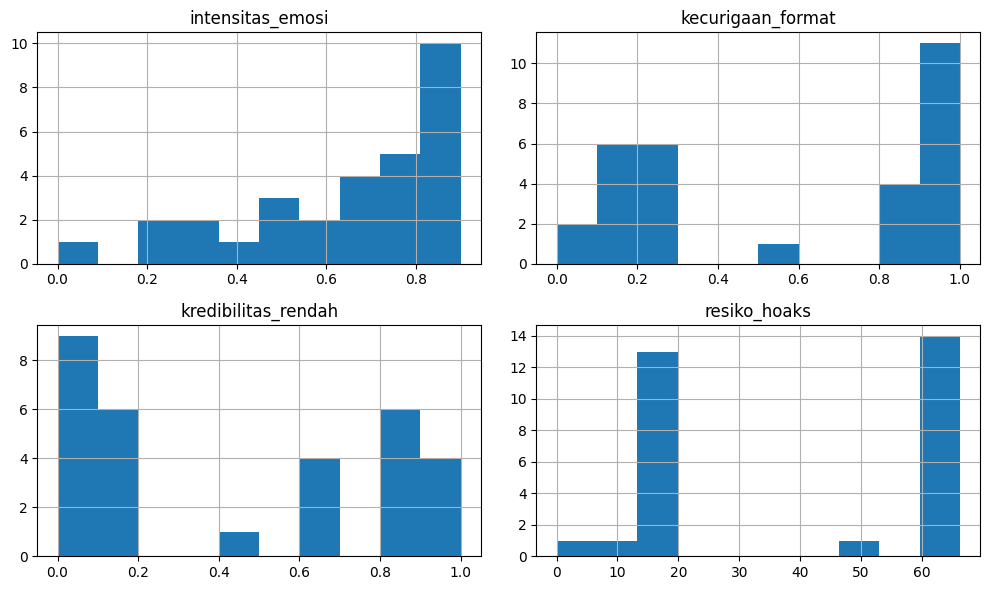

In [4]:
import matplotlib.pyplot as plt

cols_num = ["intensitas_emosi",
            "kecurigaan_format",
            "kredibilitas_rendah",
            "resiko_hoaks"]

plt.figure(figsize=(10, 6))
df[cols_num].hist(bins=10, layout=(2, 2), figsize=(10, 6))
plt.tight_layout()
plt.show()


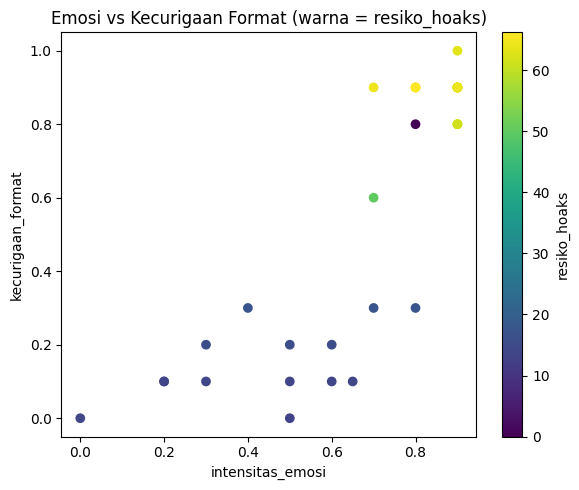

In [5]:
plt.figure(figsize=(6, 5))
scatter = plt.scatter(
    df["intensitas_emosi"],
    df["kecurigaan_format"],
    c=df["resiko_hoaks"]
)
plt.xlabel("intensitas_emosi")
plt.ylabel("kecurigaan_format")
cbar = plt.colorbar(scatter)
cbar.set_label("resiko_hoaks")
plt.title("Emosi vs Kecurigaan Format (warna = resiko_hoaks)")
plt.tight_layout()
plt.show()


Final Hoax Risk Score: 62.541159806698886


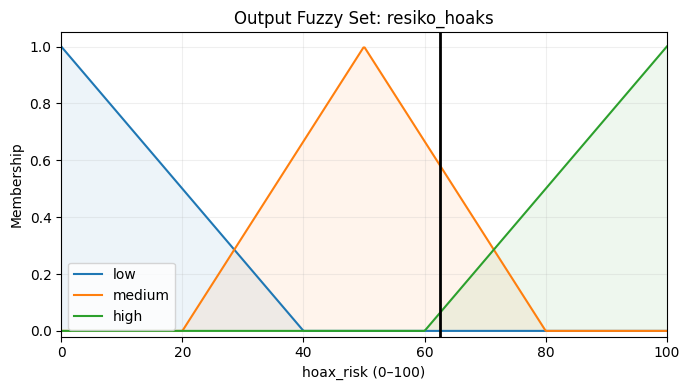

In [8]:
from src.viz import plot_hoax_risk_mfs
from src.fuzzy_system import hitung_resiko_hoaks

row = df.iloc[6]

skor = hitung_resiko_hoaks(
    intensitas_emosi=float(row["intensitas_emosi"]),
    kecurigaan_format=float(row["kecurigaan_format"]),
    kredibilitas_rendah=float(row["kredibilitas_rendah"]),
    output_scale_100=True,
)

print("Final Hoax Risk Score:", skor)

plot_hoax_risk_mfs(crisp_score=skor)


In [9]:
import pandas as pd
from pathlib import Path

ROOT_DIR = Path().resolve().parents[0]   # kalau notebook di folder /notebooks
PATH_PROCESSED = ROOT_DIR / "data" / "processed" / "hoax_dataset_llm_multimodal.csv"

df = pd.read_csv(PATH_PROCESSED)
df.head()


,id,text,file_postingan,file_profil,intensitas_emosi,kecurigaan_format,kredibilitas_rendah,resiko_hoaks
0,1,PAK JOKOWI RUNTUHKAN RENCANA LICIK SBY PRESIDE...,postingan_1.png,profil_1.png,0.9,0.9,0.8,63.358350
1,2,"💥💥Prabowo Minta Kejagung Usut,.. Total Kekayaa...",postingan_2.png,profil_2.png,0.8,0.9,0.8,63.358350
2,3,Secara mengejutkan Ali Mochtar Ngabalin sebut ...,postingan_3.png,profil_3.png,0.9,0.8,0.7,62.541160
3,4,TERBONGKAR SKANDAL DANA GELAP PUAN MAHARANI VI...,postingan_4.png,profil_4.png,0.9,1.0,0.8,63.358350
4,5,"EKONOMI T3RANC4M, N3GAR-SUNT1K Rp 901 T KE RAK...",postingan_5.png,profil_5.png,0.7,0.9,0.7,64.624286
